In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [9]:
df=pd.read_csv("C:\\Users\\BALARAM\\Downloads\\CreditCardDefault.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.isnull().values.any()
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


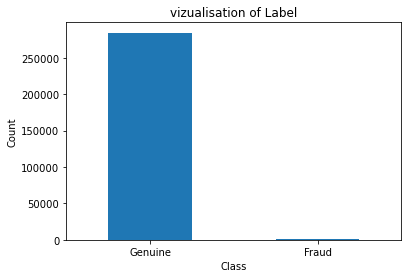

In [17]:
label=["Genuine","Fraud"]
count_class=df.value_counts(df["Class"], sort=True)
count_class.plot(kind="bar",rot=0)
plt.title("vizualisation of Label")
plt.ylabel("Count")
plt.xticks(range(2),label)
plt.show()

In [30]:
scaler=StandardScaler()


Y=df["Class"]
X=df.drop(["Class"],axis=1)

In [31]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


In [34]:
dt=DecisionTreeClassifier()
dt.fit(train_X,train_Y)
pred=dt.predict(test_X)
dt_score=dt.score(test_X,test_Y)*100

In [35]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(train_X,train_Y)

pred_rf=rf.predict(test_X)
rf_score=rf.score(test_X,test_Y)*100

In [36]:
print("Random Forest Score: ",rf_score)
print("Decision Tree Score: ",dt_score)

Random Forest Score:  99.96137776061234
Decision Tree Score:  99.91573329588147


In [53]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [42]:
confusion_matrix_dt = confusion_matrix(test_Y, pred.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[85263    44]
 [   28   108]]


In [55]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, pred_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99961
Precision: 0.93277
Recall: 0.81618
F1-score: 0.87059


In [59]:
confusion_matrix_rf = confusion_matrix(test_Y, pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)


Confusion Matrix - Random Forest
[[85299     8]
 [   25   111]]


In [60]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, pred_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99961
Precision: 0.93277
Recall: 0.81618
F1-score: 0.87059
